In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [6]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

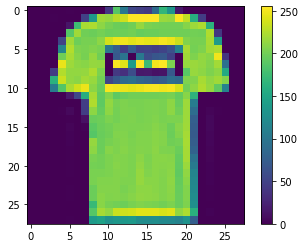

In [8]:
#let's look at what some of these images look like!
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#Data Preprocessing
train_images = train_images / 255.0

test_images = test_images / 255.0

In [10]:
#building a model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])
#here flatten changes 28*28 matrix to 1*784 matrix

In [11]:
#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10) 
#training the model

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6253 - accuracy: 0.7810
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3866 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3391 - accuracy: 0.8749
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3132 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2904 - accuracy: 0.8935
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2811 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2669 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2539 - accuracy: 0.9060
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2470 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.239

In [13]:
#evaluating the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8812
Test accuracy: 0.8812000155448914


In [14]:
#the difference in accuracy here is due to Overfitting

In [15]:
#making predictions
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([1.5638098e-07, 1.5295886e-09, 1.2079611e-09, 5.7734768e-09,
       1.6974923e-08, 1.4319253e-03, 2.1515893e-08, 1.5999569e-02,
       1.7016642e-08, 9.8256826e-01], dtype=float32)

In [22]:
class_names[np.argmax(predictions[54])]

'Pullover'

In [23]:
test_labels[54]

2

In [24]:
#BOTH 9 REPRESENTS CORRECT PREDICTION

T-shirt/top


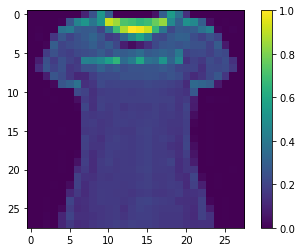

In [33]:
#checking
print(class_names[np.argmax(predictions[71])])
plt.figure()
plt.imshow(test_images[71])
plt.colorbar()
plt.grid(False)
plt.show()
#so we can say model has predicted right